In [9]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab
import pycbc.psd
import pycbc.types
import pylab
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.filter import sigma

import math
import matplotlib.pyplot as plt
import numpy as np

!git clone https://github.com/eXtremeGravityInstitute/LISA_Sensitivity 
!cp LISA_Sensitivity/* .

import LISA
lisa = LISA.LISA() 

fatal: destination path 'LISA_Sensitivity' already exists and is not an empty directory.
cp: omitting directory 'LISA_Sensitivity/binder'


The SNR is: 2277.7972


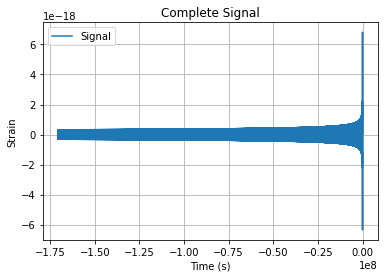

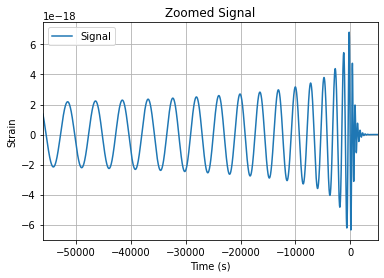

In [47]:
#ok now we generate original signal, PSD, and SNR (GOAL 1)
mass = 4100000
tsamplerate = 16
lowest_f = 0.00001
robs = 14255
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=mass, #measured in solar masses
                         mass2=mass,
                         delta_t=tsamplerate, #sample rate (tie into current_f)
                         f_lower=lowest_f, #frequency 'start' threshold
                         distance = robs)



filename = 'LISA_PSD.txt' 
delta_f = hp.sample_rate/(len(hp)) 
length = (len(hp)//2) +1

psd = pycbc.psd.from_txt(filename, length, delta_f,
                         delta_f, is_asd_file=False)

asd = pycbc.psd.from_txt(filename, length, delta_f,
                         delta_f, is_asd_file=True)


SNRp = sigma(hp, psd=psd, low_frequency_cutoff=lowest_f) #the sigma function returns SNR
SNRc = sigma(hc, psd=psd, low_frequency_cutoff=lowest_f) #cross polarisation
    
SNR = ((SNRp**2 + SNRc**2)**0.5)*0.5 #add in quadrature and half to find 'average'

print('The SNR is: {:.4f}'.format(SNR))

pylab.plot(hp.sample_times, hp, label='Signal')
#pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.title('Complete Signal')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Signal')
#pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-56000, 5000)
pylab.title('Zoomed Signal')
pylab.legend()
pylab.grid()
pylab.show() 

In [ ]:
#previous SNR without wobble correction 3222.8149
#SNR with wobble correction 2277.7972

[ 1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000. 10000.
 11000. 12000. 13000. 14000. 15000.]


Text(0, 0.5, 'SNR')

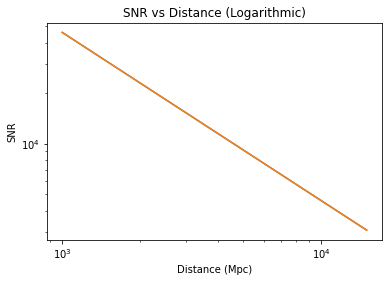

In [9]:
#now very briefly see how distance changes the SNR
SNRdist = []
distances = np.linspace(1000, 15000, 15)
print(distances)
for d in distances:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=mass, #measured in solar masses
                         mass2=mass,
                         delta_t=tsamplerate, #sample rate (tie into current_f)
                         f_lower=lowest_f, #frequency 'start' threshold
                         distance = d)
    m = sigma(hp, psd=psd, low_frequency_cutoff=lowest_f)
    #print('The SNR is: {:.4f}'.format(m))
    SNRdist.append(m)


pylab.plot(distances, SNRdist, label='SNR') 
pylab.grid()
pylab.title('SNR vs Distance')
pylab.xlabel('Distance (Mpc)')
pylab.ylabel('SNR') 
pylab.show()

pylab.loglog(distances, SNRdist, label='SNR') 
pylab.grid()
pylab.title('SNR vs Distance (Logarithmic)')
pylab.xlabel('Distance (Mpc)')
pylab.ylabel('SNR')

Text(0, 0.5, 'Characteristic Strain')

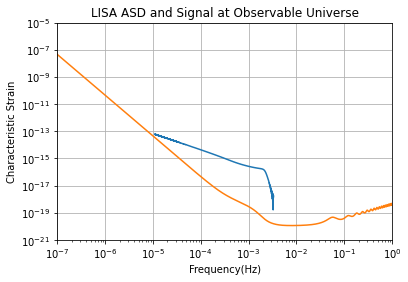

In [17]:
#now plot PSD with waveform in frequency domain at observable universe

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=mass, #measured in solar masses
                         mass2=mass,
                         delta_t=tsamplerate, #sample rate (tie into current_f)
                         f_lower=lowest_f, #frequency 'start' threshold
                         distance = robs)

#now plot ASD with waveform in frequency domain
f  = np.linspace(1.0e-9, 1.0e0, 2048*256)
Sn = lisa.Sn(f)
asd = Sn**0.5
hpfft = np.fft.fft(hp) #fourier transform of waveform
#now we need the base
f2 = np.arange(len(hpfft)) * hp.sample_rate/(len(hpfft)) #pretty sure this is cheating

lgc_array = (f2 > 0.000011) & (f2 < 0.0033)


#pylab.loglog(f2, abs(hpfft), label = 'Signal')
pylab.loglog(f2[lgc_array], abs(hpfft)[lgc_array])
pylab.loglog(f, asd, label='ASD') 
pylab.grid()
pylab.xlim(10e-8, 1)
pylab.ylim(10e-22, 10e-6)
pylab.title('LISA ASD and Signal at Observable Universe')
pylab.xlabel('Frequency(Hz)')
pylab.ylabel('Characteristic Strain')

Text(0, 0.5, 'Characteristic Strain')

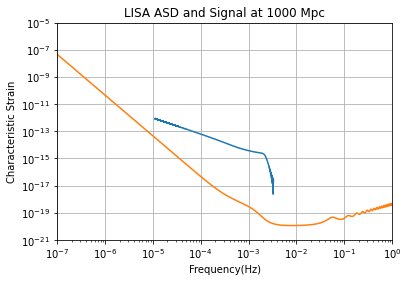

In [18]:
#now plot PSD with waveform in frequency domain at 1000mpc

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=mass, #measured in solar masses
                         mass2=mass,
                         delta_t=tsamplerate, #sample rate (tie into current_f)
                         f_lower=lowest_f, #frequency 'start' threshold
                         distance = 1000)

#now plot ASD with waveform in frequency domain
f  = np.linspace(1.0e-9, 1.0e0, 2048*256)
Sn = lisa.Sn(f)
asd = Sn**0.5
hpfft = np.fft.fft(hp) #fourier transform of waveform
#now we need the base
f2 = np.arange(len(hpfft)) * hp.sample_rate/(len(hpfft)) #pretty sure this is cheating

lgc_array = (f2 > 0.000011) & (f2 < 0.0033)


#pylab.loglog(f2, abs(hpfft), label = 'Signal')
pylab.loglog(f2[lgc_array], abs(hpfft)[lgc_array])
pylab.loglog(f, asd, label='ASD') 
pylab.grid()
pylab.xlim(10e-8, 1)
pylab.ylim(10e-22, 10e-6)
pylab.title('LISA ASD and Signal at 1000 Mpc')
pylab.xlabel('Frequency(Hz)')
pylab.ylabel('Characteristic Strain')

The SNR is: 2027.0036
 
The SNR is: 3142.2749
 
The SNR is: 3019.5981
 
The SNR is: 2277.8999
 
The SNR is: 1668.4115
 
The SNR is: 1349.2994
 
The SNR is: 1198.3643
 
The SNR is: 1123.8200
 
The SNR is: 1082.7159
 
The SNR is: 1057.6345
 
The SNR is: 1041.2603
 
The SNR is: 1029.6161
 
The SNR is: 1020.4550
 
The SNR is: 1013.4580
 
The SNR is: 1007.3710
 
The SNR is: 1003.2968
 
The SNR is: 1000.1347
 
The SNR is: 998.6974
 
The SNR is: 998.2891
 
The SNR is: 999.8793
 


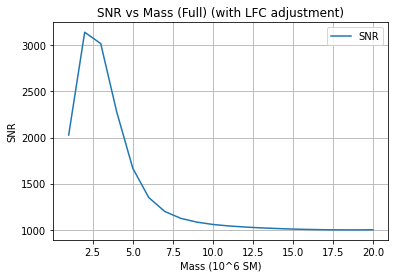

In [21]:
#generate SNR vs mass at robs (in mass at obvservable universe)

#this looks at SNR between 1000000 and 20000000 SM (aim - factor of 100?)
#initial conditions
fullmass_range = [] 
for l in range(1,21):
    fullmass_range.append(l)
    
fullSNRresults = []
delta = []
currentf = []
samplerate = []

#calculated initial conditions from above
mass = 1025000 #(1/4 original mass)
initialsamplerate = 6.7271713220 
lowest_f = 0.0000237841
robs = 14255


for m in fullmass_range:
    
    y= mass*m
    delta_m = m 
    delta_f = (delta_m**(-5./3.)) ** (3./8.) 
    current_f = lowest_f*delta_f    

    delta_sample = (delta_m**(-5./3.)) ** (3./8.)
    tsamplerate = initialsamplerate/delta_sample 
    
    #print('The mass of each CBO is: {:.4f}'.format(y))
    #print('The delta m is: {:.4f}'.format(delta_m))
    #print('The delta f is: {:.4f}'.format(delta_f))
    #print('The current_f is: {:.8f}'.format(current_f))
    #print('The delta sample is: {:.4f}'.format(delta_sample))
    #print('The sample rate is: {:.4f}'.format(tsamplerate))
    
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=mass*m, #measured in solar masses
                         mass2=mass*m,
                         delta_t=tsamplerate, #sample rate (tie into current_f)
                         f_lower=current_f, #frequency 'start' threshold
                         distance = robs)
    
    z = len(hp)
    #print('The hp length is: {:.f}'.format(z))

    filename = 'LISA_PSD.txt' 
    delta_f2 = hp.sample_rate/(len(hp)) 
    length = (len(hp)//2) +1

    psd = pycbc.psd.from_txt(filename, length, delta_f2,
                         delta_f2, is_asd_file=False)

    SNRp = sigma(hp, psd=psd, low_frequency_cutoff=lowest_f) #the sigma function returns SNR
    SNRc = sigma(hc, psd=psd, low_frequency_cutoff=lowest_f) #cross polarisation
    
    SNR = ((SNRp**2 + SNRc**2)**0.5)*0.5 #add in quadrature and half to find 'average'

    print('The SNR is: {:.4f}'.format(SNR))
    print(' ')
    #pylab.plot(hp.sample_times, hp, label='Signal')
    #pylab.plot(hp.sample_times, hc, label='Cross Polarization')
    #pylab.xlabel('Time (s)')
    #pylab.ylabel('Strain')
    #pylab.title('m = {:.4f}'.format(m))
    #pylab.legend()
    #pylab.grid()
    #pylab.show()
    
    fullSNRresults.append(SNR)
    delta.append(delta_f)
    currentf.append(current_f)
    samplerate.append(tsamplerate)
    
pylab.plot(fullmass_range, fullSNRresults, label='SNR')
pylab.xlabel('Mass (10^6 SM)')
pylab.ylabel('SNR')
pylab.title('SNR vs Mass (Full) (with LFC adjustment)')
pylab.legend()
pylab.grid()
pylab.show()

NameError: name 'f' is not defined

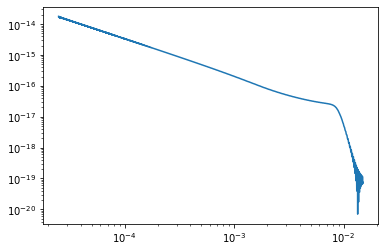

In [4]:
#FT 1m SM

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=1025000, #measured in solar masses
                         mass2=1025000,
                         delta_t=6.7272, #sample rate
                         f_lower=0.00002378, #frequency 'start' threshold
                         distance = 14255)

#now plot ASD with waveform in frequency domain

hpfft = np.fft.fft(hp) #fourier transform of waveform
#now we need the base
f2 = np.arange(len(hpfft)) * hp.sample_rate/(len(hpfft)) #pretty sure this is cheating

lgc_array = (f2 > 0.000025) & (f2 < 0.015)


#pylab.loglog(f2, abs(hpfft), label = 'Signal')
pylab.loglog(f2[lgc_array], abs(hpfft)[lgc_array])
pylab.loglog(f, asd, label='ASD') 
pylab.grid()
pylab.xlim(10e-8, 1)
pylab.ylim(10e-22, 10e-6)
pylab.title('LISA ASD and Signal at Observable Universe, Mass = 1025000SM')
pylab.xlabel('Frequency(Hz)')
pylab.ylabel('Characteristic Strain')

Text(0, 0.5, 'Characteristic Strain')

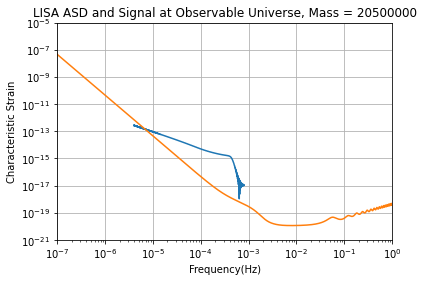

In [29]:
#FT 20m SM
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=20500000, #measured in solar masses
                         mass2=20500000,
                         delta_t=43.7498, #sample rate
                         f_lower=0.00000366, #frequency 'start' threshold
                         distance = 14255)

#now plot ASD with waveform in frequency domain

hpfft = np.fft.fft(hp) #fourier transform of waveform
#now we need the base
f2 = np.arange(len(hpfft)) * hp.sample_rate/(len(hpfft)) #pretty sure this is cheating

lgc_array = (f2 > 0.000004) & (f2 < 0.0008)


#pylab.loglog(f2, abs(hpfft), label = 'Signal')
pylab.loglog(f2[lgc_array], abs(hpfft)[lgc_array])
pylab.loglog(f, asd, label='ASD') 
pylab.grid()
pylab.xlim(10e-8, 1)
pylab.ylim(10e-22, 10e-6)
pylab.title('LISA ASD and Signal at Observable Universe, Mass = 20500000')
pylab.xlabel('Frequency(Hz)')
pylab.ylabel('Characteristic Strain')

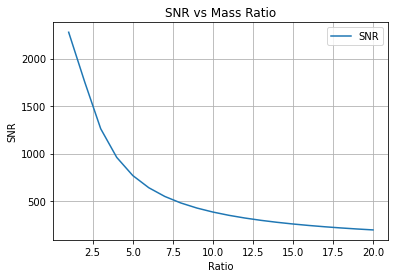

In [30]:
#this looks at SNR for mass ratios up to 1:20 (GOAL 3)
#initial conditions
ratiomass_range = [] 
for l in range(1,21):
    ratiomass_range.append(l)
    
ratioSNRresults = []
ratiobase = []
m1list = []
m2list = []

totalmass = 8200000
initialsamplerate = 16
lowest_f = 0.00001
robs = 14255


#consider total mass = 82000000
#chirp mass?

for m in ratiomass_range:
    
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=(totalmass/(m+1))*m, #measured in solar masses
                         mass2=(totalmass/(m+1)),
                         delta_t=initialsamplerate, #sample rate (tie into current_f)
                         f_lower=lowest_f, #frequency 'start' threshold
                         distance = robs)

    filename = 'LISA_PSD.txt' 
    delta_f2 = hp.sample_rate/(len(hp)) 
    length = (len(hp)//2) +1

    psd = pycbc.psd.from_txt(filename, length, delta_f2,
                         delta_f2, is_asd_file=False)

    #this section removes the wobble in the SNR which was due to phase cutoff of late waveform
    SNRp = sigma(hp, psd=psd, low_frequency_cutoff=lowest_f) #the sigma function returns SNR
    SNRc = sigma(hc, psd=psd, low_frequency_cutoff=lowest_f) #cross polarisation
    
    SNR = ((SNRp**2 + SNRc**2)**0.5)*0.5 #add in quadrature and half to find 'average'
    
    m1 = (totalmass/(m+1))*m
    m2 = (totalmass/(m+1))
    y = m1/m2
    
    
    #print('m1 is: {:.4f}'.format(m1))
    #print('m2 is: {:.4f}'.format(m2))
    #print('The mass ratio is: {:}:1'.format(int(y)))
    #print('The SNR is: {:.4f}'.format(SNR))
    #print(' ')
    
    ratioSNRresults.append(SNR)
    ratiobase.append(y)
    m1list.append(m1)
    m2list.append(m2)
    
pylab.plot(ratiobase, ratioSNRresults, label='SNR')
#pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Ratio')
pylab.ylabel('SNR')
pylab.title('SNR vs Mass Ratio')
pylab.legend()
pylab.grid()
pylab.show()

In [40]:
ratioSNRresults

[2277.7971920124055,
 1755.009474935081,
 1261.8881394774342,
 960.1928289028563,
 769.4324543393226,
 640.9140770653914,
 549.03309465094,
 480.4114370368989,
 427.14635518772644,
 384.8451084036607,
 350.4022424482066,
 321.7502874615967,
 297.5254065092716,
 276.8866303414646,
 258.9663251893076,
 243.36192412951303,
 229.5565145364337,
 217.32702343917143,
 206.41759429019265,
 196.61551520031935]

The SNR is: 0.2442
The SNR is: 14.9883
The SNR is: 52.6936
The SNR is: 101.3868
The SNR is: 150.0729
The SNR is: 195.4181
The SNR is: 238.6492
The SNR is: 281.3921
The SNR is: 325.1737
The SNR is: 371.5295
The SNR is: 421.6760
The SNR is: 477.5783
The SNR is: 541.4904
The SNR is: 615.5839
The SNR is: 703.4901
The SNR is: 807.9642
The SNR is: 932.9993
The SNR is: 1081.5124
The SNR is: 1254.9957
The SNR is: 1452.2466
The SNR is: 1663.1220
The SNR is: 1867.8580
The SNR is: 2035.8619
The SNR is: 2150.1732
The SNR is: 2214.8565
The SNR is: 2248.0292
The SNR is: 2263.5905
The SNR is: 2270.9084
The SNR is: 2274.0867
The SNR is: 2275.5830
The SNR is: 2276.2021
The SNR is: 2276.5090
The SNR is: 2276.6407
The SNR is: 2276.7142
The SNR is: 2276.7585
[26441892.744920015, 222444.94361228202, 44182.000767596815, 16266.94202557972, 7877.246211341801, 4456.87319629466, 2788.226319408551, 1871.3392954132498, 1322.9261100591152, 973.3558755785908, 739.2172106580812, 576.0468426940656, 458.5777501476664,

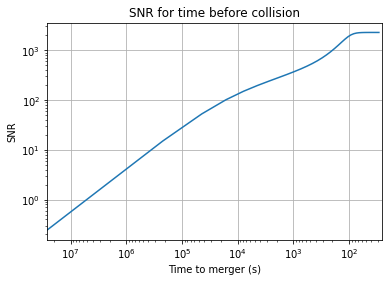

In [5]:
#early detection (full SNR over time)
#this runs up until collision (I think), larger samples
#regenerate signal

mass = 4100000
tsamplerate = 16
lowest_f = 0.00001
robs = 14255
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=mass, #measured in solar masses
                         mass2=mass,
                         delta_t=tsamplerate, #sample rate (tie into current_f)
                         f_lower=lowest_f, #frequency 'start' threshold
                         distance = robs)

filename = 'LISA_PSD.txt' 
delta_f = hp.sample_rate/(len(hp)) 
length = (len(hp)//2) +1

psd = pycbc.psd.from_txt(filename, length, delta_f,
                         delta_f, is_asd_file=False)
full_hfc_list = []

for i in range (2,352, 10):
    full_hfc_list.append(i*lowest_f)

full_earlySNR = []

for hfc in full_hfc_list:
    SNRp = sigma(hp, psd=psd, low_frequency_cutoff=lowest_f, high_frequency_cutoff = hfc) #the sigma function returns SNR
    SNRc = sigma(hc, psd=psd, low_frequency_cutoff=lowest_f, high_frequency_cutoff = hfc) #cross polarisation
    
    SNR = ((SNRp**2 + SNRc**2)**0.5)*0.5 #add in quadrature and half to find 'average'
    
    full_earlySNR.append(SNR)
    
    print('The SNR is: {:.4f}'.format(SNR))

pi = math.pi
tc = 0
fgw = 0.001
G = 6.67 * (10**-11)
c = 3 * (10**8)
SM = 1.989 * (10**30)

m1 = 4100000 * SM
m2 = 4100000 * SM 

M = ((m1*m2)**(3/5))/((m1+m2)**(1/5))

a = fgw**(-8/3)
b = (8*pi)**(-8/3)
d = ((G*M)/(c**3))**(-5/3)

full_times = []

for fgw in full_hfc_list:
    a = fgw**(-8/3)
    t = 5*a*b*d #took out tc-, got rid of chunk below
    full_times.append(t)
    


    
print(full_times)


fig, ax = plt.subplots()

ax.loglog(full_times, full_earlySNR)
ax.set_xlim(26441892, 26)  # decreasing time
ax.set_xlabel('Time to merger (s)')
ax.set_ylabel('SNR')
ax.set_title('SNR for time before collision')
ax.grid(True)

In [2]:
#this gives the times and SNR results for the full merger
print(full_times)
print(full_earlySNR)

1.5

The SNR is: 0.1176
The SNR is: 0.2442
The SNR is: 0.4152
The SNR is: 0.6361
The SNR is: 0.9102
The SNR is: 1.2399
The SNR is: 1.6267
The SNR is: 2.0735
The SNR is: 2.5809
The SNR is: 3.1505
The SNR is: 3.7821
The SNR is: 4.4783
The SNR is: 5.2392
The SNR is: 6.0640
The SNR is: 6.9531
The SNR is: 7.9092
The SNR is: 8.9291
The SNR is: 10.0144
The SNR is: 11.1616
The SNR is: 12.3746
[56945905.564744204, 26441892.744920027, 14583636.735938074, 8968418.140793353, 5945536.862910334, 4164337.1585484087, 3041859.5493155043, 2296778.8634535675, 1781306.6493941338, 1412437.3499805734, 1140959.538251433, 936363.3808133323, 779009.0302194823, 655842.0056143181, 557941.5772655822, 479062.85962579196, 414740.30904860573, 361720.0046273465, 317590.6661399736, 280538.21798617207]


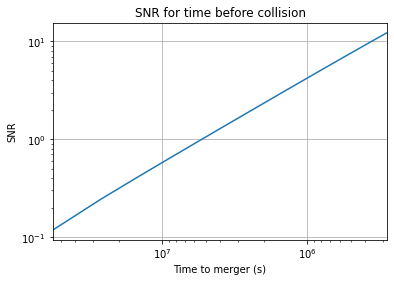

In [6]:
#this is the zoom in, smaller samples

mass = 4100000
tsamplerate = 16
lowest_f = 0.00001
robs = 14255
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=mass, #measured in solar masses
                         mass2=mass,
                         delta_t=tsamplerate, #sample rate (tie into current_f)
                         f_lower=lowest_f, #frequency 'start' threshold
                         distance = robs)

filename = 'LISA_PSD.txt' 
delta_f = hp.sample_rate/(len(hp)) 
length = (len(hp)//2) +1

psd = pycbc.psd.from_txt(filename, length, delta_f,
                         delta_f, is_asd_file=False)
hfc_list = []

for i in range (3,23):
    hfc_list.append(i*0.5e-5)

earlySNR = []

for hfc in hfc_list:
    SNRp = sigma(hp, psd=psd, low_frequency_cutoff=lowest_f, high_frequency_cutoff = hfc) #the sigma function returns SNR
    SNRc = sigma(hc, psd=psd, low_frequency_cutoff=lowest_f, high_frequency_cutoff = hfc) #cross polarisation
    
    SNR = ((SNRp**2 + SNRc**2)**0.5)*0.5 #add in quadrature and half to find 'average'
    earlySNR.append(SNR)
    print('The SNR is: {:.4f}'.format(SNR))

pi = math.pi
tc = 0
fgw = 0.001
G = 6.67e-11
c = 3e8
SM = 1.989e30

m1 = 4100000 * SM
m2 = 4100000 * SM 

M = ((m1*m2)**(3/5))/((m1+m2)**(1/5))

a = fgw**(-8/3)
b = (8*pi)**(-8/3)
d = ((G*M)/(c**3))**(-5/3)

times = []

for fgw in hfc_list:
    a = fgw**(-8/3)
    t = 5*a*b*d #took out tc-, got rid of chunk below
    times.append(t)
    
print(times)


fig, ax = plt.subplots()

ax.loglog(times, earlySNR)
ax.set_xlim(56945905, 280538)  # decreasing time
ax.set_xlabel('Time to merger (s)')
ax.set_ylabel('SNR')
ax.set_title('SNR for time before collision')
ax.grid(True)

In [7]:
#this gives the times and SNR results for the small samples
print(times)
print(earlySNR)


[56945905.564744204, 26441892.744920027, 14583636.735938074, 8968418.140793353, 5945536.862910334, 4164337.1585484087, 3041859.5493155043, 2296778.8634535675, 1781306.6493941338, 1412437.3499805734, 1140959.538251433, 936363.3808133323, 779009.0302194823, 655842.0056143181, 557941.5772655822, 479062.85962579196, 414740.30904860573, 361720.0046273465, 317590.6661399736, 280538.21798617207]
[0.11758881711794571, 0.24423193916133873, 0.4151737728627785, 0.6361272157291404, 0.910212581096839, 1.2398967772152676, 1.6267476774813707, 2.073464027926157, 2.5809422852539554, 3.150522421132998, 3.7820771161246576, 4.478317202800953, 5.239178621884888, 6.063954371240842, 6.9530536452541245, 7.909196847216673, 8.929101740679961, 10.014401983910647, 11.161608859613132, 12.374580685989923]


In [ ]:
#this is the zoom in with mass ratio, smaller samples 
#takes forever to run but produces a list of max times reached and complementary ratio list
ratio_hfc_list = []
hfclist = []

for i in range (18,35):
    ratio_hfc_list.append(i*0.5e-5)
    
earlyratiomass_range = []
for l in range(2,21, 2):
        earlyratiomass_range.append(l)

earlySNRratio = []
earlySNRratioresults = []
earlyratiobase = []
m1list = []
m2list = []

pi = math.pi
tc = 0
fgw = 0.001
G = 6.67e-11
c = 3e8
SM = 1.989e30

m1 = 4100000 * SM
m2 = 4100000 * SM 

M = ((m1*m2)**(3/5))/((m1+m2)**(1/5))

a = fgw**(-8/3)
b = (8*pi)**(-8/3)
d = ((G*M)/(c**3))**(-5/3)

earlyratiotimes = []

totalmass = 8200000
initialsamplerate = 16
lowest_f = 0.00001
robs = 14255
 

for m in earlyratiomass_range:
    
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=(totalmass/(m+1))*m, #measured in solar masses
                         mass2=(totalmass/(m+1)),
                         delta_t=initialsamplerate, #sample rate (tie into current_f)
                         f_lower=lowest_f, #frequency 'start' threshold
                         distance = robs)

    filename = 'LISA_PSD.txt' 
    delta_f2 = hp.sample_rate/(len(hp)) 
    length = (len(hp)//2) +1

    psd = pycbc.psd.from_txt(filename, length, delta_f2,
                         delta_f2, is_asd_file=False)
    
    m1 = (totalmass/(m+1))*m
    m2 = (totalmass/(m+1))
    y = m1/m2
    
    earlyratiobase.append(y)
    m1list.append(m1)
    m2list.append(m2)
    print('The mass ratio is: {:}:1'.format(int(y)))
    print(' ')
    
    for hfc in ratio_hfc_list:

        #this section removes the wobble in the SNR which was due to phase cutoff of late waveform
        SNRp = sigma(hp, psd=psd, low_frequency_cutoff=lowest_f, high_frequency_cutoff = hfc) #the sigma function returns SNR
        SNRc = sigma(hc, psd=psd, low_frequency_cutoff=lowest_f, high_frequency_cutoff = hfc) #cross polarisation
    
        SNR = ((SNRp**2 + SNRc**2)**0.5)*0.5 #add in quadrature and half to find 'average'
        
        if SNR < 8:
        
            hfclist.append(hfc)
            earlySNRratioresults.append(SNR)
        
        
            print(' ')
            print('The HFC is: {:.8f}'.format(hfc))
            print('The SNR is: {:.4f}'.format(SNR))
        
        if SNR > 8:

            a = hfc**(-8/3)
            t = 5*a*b*d #took out tc-, got rid of chunk below
        
            earlyratiotimes.append(t)
                
            break 
    
        #print('m1 is: {:.4f}'.format(m1))
        #print('m2 is: {:.4f}'.format(m2))
        #print('The mass ratio is: {:}:1'.format(int(y)))
        #print('The SNR is: {:.4f}'.format(SNR))
        #print(' ')
   
            
print(earlySNRratioresults)   
print(hfclist)
print(earlyratiotimes)


The mass ratio is: 2:1
 
 
The HFC is: 0.00001500
The SNR is: 0.1107
 
The HFC is: 0.00002000
The SNR is: 0.2299
 
The HFC is: 0.00002500
The SNR is: 0.3909
 
The HFC is: 0.00003000
The SNR is: 0.5988
 
The HFC is: 0.00003500
The SNR is: 0.8565
 
The HFC is: 0.00004000
The SNR is: 1.1667
 
The HFC is: 0.00004500
The SNR is: 1.5308
 
The HFC is: 0.00005000
The SNR is: 1.9505
 
The HFC is: 0.00005500
The SNR is: 2.4273
 
The HFC is: 0.00006000
The SNR is: 2.9622
 
The HFC is: 0.00006500
The SNR is: 3.5561
 
The HFC is: 0.00007000
The SNR is: 4.2098
 
The HFC is: 0.00007500
The SNR is: 4.9241
 
The HFC is: 0.00008000
The SNR is: 5.6985
 
The HFC is: 0.00008500
The SNR is: 6.5341
 
The HFC is: 0.00009000
The SNR is: 7.4298
 
The HFC is: 0.00009500
The SNR is: 8.3868
 
The HFC is: 0.00010000
The SNR is: 9.4034
 
The HFC is: 0.00010500
The SNR is: 10.4811
 
The HFC is: 0.00011000
The SNR is: 11.6172
The mass ratio is: 4:1
 
 
The HFC is: 0.00001500
The SNR is: 0.0938
 
The HFC is: 0.00002000

In [7]:
print(earlyratiotimes)
print(earlyratiobase)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [ ]:
y = 3/2
y